<a href="https://colab.research.google.com/github/ghrahul/ML-DL-PRACTICE/blob/master/Tensorflow%20in%20TPU/Tensorflow_on_TPU_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import os
import datetime 

import tensorflow_datasets as tfds

In [0]:
#batch size is -1 because we want to load it in our local cpu ram
#TPU is a part of GCP so, if we are not using GCP then we want to have
#our data in our local RAM
datasets, info = tfds.load(name="fashion_mnist", with_info=True, as_supervised=True, split=["train", "test"], batch_size=-1)

In [0]:
img_train, info_train = tfds.load(name="fashion_mnist", with_info=True, split="test")

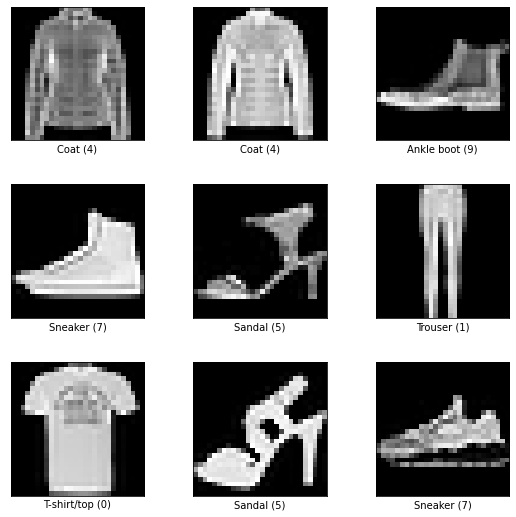

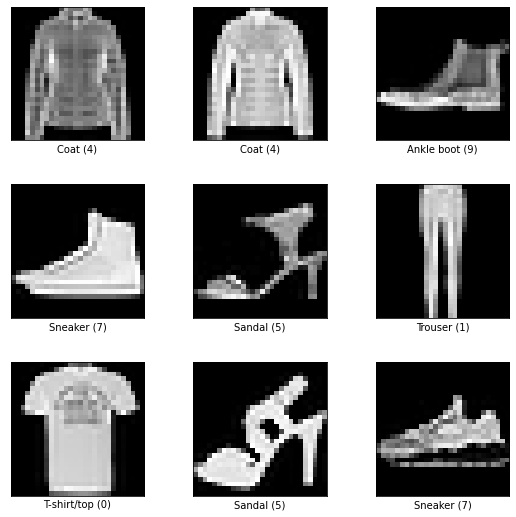

In [6]:
tfds.show_examples(info_train, img_train)

In [7]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [0]:
train, test = tfds.as_numpy(datasets[0]), tfds.as_numpy(datasets[1])

In [0]:
#if we use sparse_categorical_entropy then no need to pass one_hot encoded 
#labels but here we are using categorical_entropy 
x_train, y_train = train[0]/255, tf.one_hot(train[1], 10)
x_test, y_test = test[0]/255, tf.one_hot(test[1], 10)

In [0]:
x_test, x_val = x_test[5000:], x_test[:5000]
y_test, y_val = y_test[5000:], y_test[:5000]

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
print(x_test.shape, x_val.shape)

(5000, 28, 28, 1) (5000, 28, 28, 1)


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, 5, padding="same", activation="relu", input_shape=(28,28,1) ))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(64, 5, padding="same", activation="relu", input_shape=(28,28,1) ))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(128, 5, padding="same", activation="relu", input_shape=(28,28,1) ))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(256, 5, padding="same", activation="relu", input_shape=(28,28,1) ))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation("softmax"))
  return model

In [14]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver("grpc://" + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)
x_train = x_train.astype(np.float32)
y_train = np.float32(y_train)
x_val = x_val.astype(np.float32)
y_val = np.float32(y_val)
with strategy.scope():
  model = create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )
  

  history=model.fit(
      x_train, y_train, batch_size=256,
      epochs=25, steps_per_epoch=234, validation_data=(x_val, y_val),
      validation_freq=1
  )

INFO:tensorflow:Initializing the TPU system: grpc://10.99.50.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.99.50.82:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Epoch 1/25
234/234 [==============================] - 6s 27ms/step - loss: 0.7444 - accuracy: 0.7191 - val_loss: 0.4348 - val_accuracy: 0.8464
Epoch 2/25
234/234 [==============================] - 4s 17ms/step - loss: 0.4027 - accuracy: 0.8520 - val_loss: 0.3292 - val_accuracy: 0.8766
Epoch 3/25
234/234 [==============================] - 4s 17ms/step - loss: 0.3366 - accuracy: 0.8778 - val_loss: 0.2932 - val_accuracy: 0.8918
Epoch 4/25
234/234 [==============================] - 4s 17ms/step - loss: 0.3019 - accuracy: 0.8911 - val_loss: 0.2804 - val_accuracy: 0.8998
Epoch 5/25
234/234 [==============================] - 4s 17ms/step - loss: 0.2826 - accuracy: 0.8964 - val_loss: 0.2644 - val_accuracy: 0.9074
Epoch 6/25
234/234 [==============================] - 4s 17ms/step - loss: 0.2600 - accuracy: 0.9047 - val_loss: 0.2661 - val_accuracy: 0.9040
Epoch 7/25
234/234 [==============================] - 4s 17ms/step - loss: 0.2511 - accuracy: 0.9076 - val_loss: 0.2515 - val_accuracy: 0.9128

In [15]:
!ls

drive  sample_data


In [0]:
model.save('sample_data/fminst.hdf5')

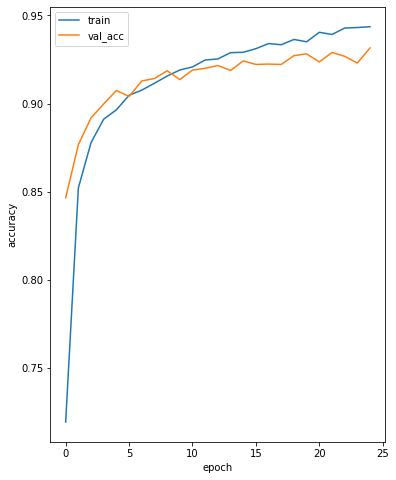

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'])
plt.show()

In [0]:
fminst_load = tf.keras.models.load_model('sample_data/fminst.hdf5')

In [19]:
fminst_load.evaluate(x_test, y_test)

157/157 [==============================] - 1s 9ms/step - loss: 0.2292 - accuracy: 0.9254


[0.22924788296222687, 0.9254000186920166]

In [0]:
y_pred = fminst_load.predict(x_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
labels = info.features["label"].names

In [23]:
y_pred

array([[2.12034244e-11, 1.00000000e+00, 6.29282122e-14, ...,
        3.39899164e-18, 4.77278581e-17, 4.66037494e-17],
       [5.05519569e-01, 1.04085814e-07, 2.81218468e-04, ...,
        1.56391362e-08, 9.24407288e-07, 4.87194143e-08],
       [9.17991102e-01, 5.47107447e-06, 8.03007111e-02, ...,
        9.13114491e-07, 1.37754469e-04, 3.39490242e-07],
       ...,
       [1.07765481e-01, 4.56142152e-04, 3.70151639e-01, ...,
        1.34567716e-04, 9.62745491e-03, 2.53198872e-04],
       [8.57289342e-05, 1.14002924e-05, 6.91125169e-02, ...,
        2.15165258e-07, 9.31190789e-06, 1.15092428e-06],
       [2.19493466e-22, 1.00000000e+00, 2.15720399e-25, ...,
        2.47080372e-33, 3.58842169e-33, 7.30277370e-31]], dtype=float32)

In [28]:
print(classification_report(np.float32(y_test).argmax(axis=1), np.float32(y_pred).argmax(axis=1), target_names=info.features["label"].names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.90      0.88       489
     Trouser       0.99      0.99      0.99       513
    Pullover       0.86      0.90      0.88       478
       Dress       0.94      0.91      0.92       510
        Coat       0.87      0.91      0.88       518
      Sandal       0.99      0.98      0.99       494
       Shirt       0.83      0.73      0.78       519
     Sneaker       0.95      0.99      0.97       484
         Bag       0.98      0.98      0.98       496
  Ankle boot       0.99      0.96      0.97       499

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.92      5000



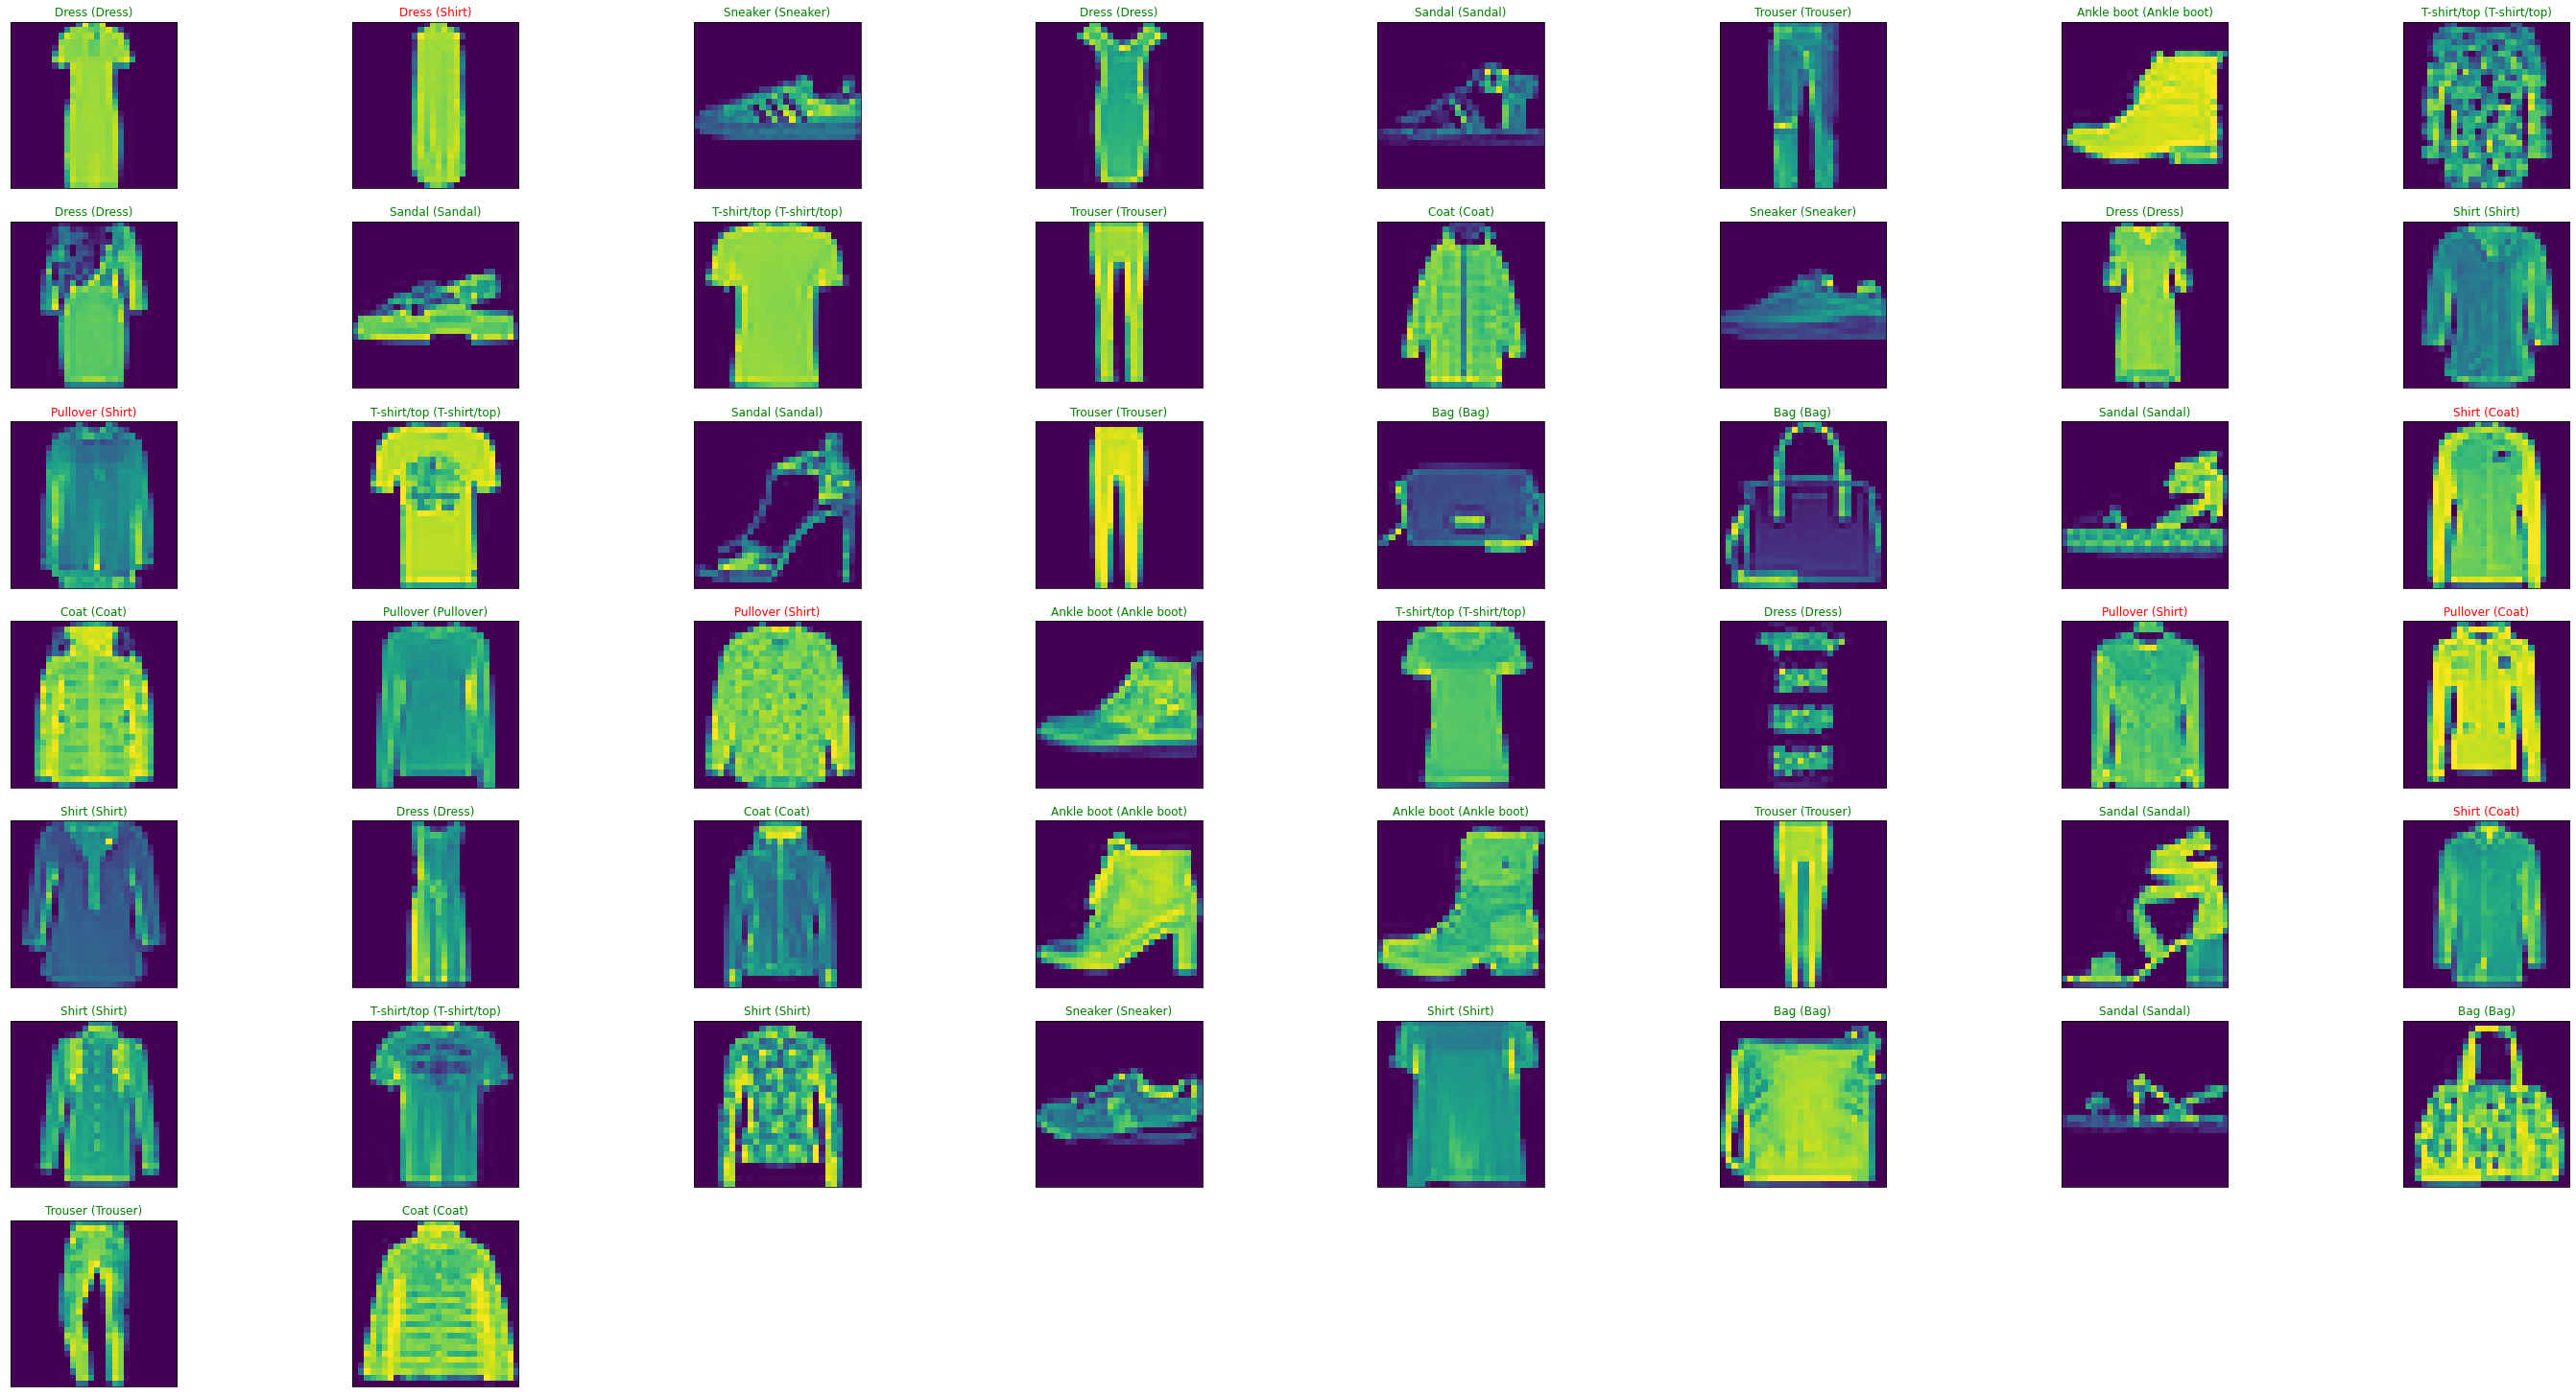

In [39]:
figure = plt.figure(figsize=(50,30))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=50, replace=False)):
  ax = figure.add_subplot(8, 8, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[index]))
  predict_index = np.argmax(y_pred[index])
  true_index = np.argmax(y_test.numpy()[index])
  ax.set_title("{} ({})".format(labels[predict_index], labels[true_index]), color=("green" if predict_index==true_index else "red"))